In [358]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow.keras import Sequential, layers, losses, optimizers, models
import tensorflow as tf
import os
from sklearn.metrics import roc_curve
import random as python_random
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [359]:
seed_num = 1008  #394 1007 1008 
np.random.seed(seed_num)
python_random.seed(seed_num)
tf.random.set_seed(seed_num)

In [360]:
excel_data=pd.read_excel('축우 치수데이터(20221129) - 체형추가.xlsx', sheet_name='ResultWeight_MainDimension', header=1)

In [361]:
num_data = excel_data.to_numpy()
Corr = num_data[1,3:]
소파일명 = num_data[2:,2]
치수 = num_data[2:,3:-1]
체형 = num_data[2:,-1].astype('float32')
print(f'치수_shape = {치수.shape}\n체형_shape = {체형.shape}') #35개의 선별 치수 + 둘레, 폭, 높이당 면적

치수_shape = (312, 23)
체형_shape = (312,)


In [362]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(치수)

치수_train, 체형_train, 치수_test, 체형_test = 치수[:212], 체형[:212], 치수[212:], 체형[212:]


# ---scaler 저장---
from pickle import dump
dump(minmax_scaler, open('./minmax_scaler.pkl', 'wb'))

'''
#---scaler 불러오기---
from pickle import load
load_minmax_scaler = load(open('./minmax_scaler.pkl', 'rb'))
'''

"\n#---scaler 불러오기---\nfrom pickle import load\nload_minmax_scaler = load(open('./minmax_scaler.pkl', 'rb'))\n"

In [363]:
치수_train.shape

(212, 23)

In [364]:
치수_scaled = minmax_scaler.transform(치수_train)
치수_all_scaled = minmax_scaler.transform(치수)
치수_scaled.shape

(212, 23)

In [365]:
shuff = np.arange(치수_scaled.shape[0])
np.random.shuffle(shuff)
shuff_train, shuff_val = shuff[:round(shuff.shape[0]*0.7)], shuff[round(shuff.shape[0]*0.7):]

In [366]:
checkpoint_path = './temp/checkpoint.ckpt'
optimizer = optimizers.Adam()
model = Sequential()
model_check_point = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path, monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch', options=None)
model.add(tf.keras.layers.Dense(23, input_dim =23,activation = 'relu'))
model.add(tf.keras.layers.Dense(23,activation = 'relu'))
model.add(tf.keras.layers.Dense(11,activation = 'relu'))
model.add(tf.keras.layers.Dense(11,activation = 'relu'))
model.add(tf.keras.layers.Dense(5,  activation='softmax'))
model.compile(
    loss=sparse_categorical_crossentropy, 
    optimizer=optimizer, 
    metrics=['acc'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_149 (Dense)           (None, 23)                552       
                                                                 
 dense_150 (Dense)           (None, 23)                552       
                                                                 
 dense_151 (Dense)           (None, 11)                264       
                                                                 
 dense_152 (Dense)           (None, 11)                132       
                                                                 
 dense_153 (Dense)           (None, 5)                 60        
                                                                 
Total params: 1,560
Trainable params: 1,560
Non-trainable params: 0
_________________________________________________________________


In [367]:
history = model.fit(치수_scaled[shuff_train], 체형_train[shuff_train], validation_data=(치수_scaled[shuff_val], 체형_train[shuff_val]), batch_size=32, epochs=200, callbacks = model_check_point)

Epoch 1/200
5/5 [==============================] - 1s 125ms/step - loss: 1.6181 - acc: 0.0135 - val_loss: 1.6041 - val_acc: 0.1875
Epoch 2/200
5/5 [==============================] - 0s 16ms/step - loss: 1.6006 - acc: 0.3649 - val_loss: 1.5912 - val_acc: 0.5938
Epoch 3/200
5/5 [==============================] - 0s 15ms/step - loss: 1.5909 - acc: 0.5811 - val_loss: 1.5805 - val_acc: 0.6250
Epoch 4/200
5/5 [==============================] - 0s 16ms/step - loss: 1.5808 - acc: 0.6014 - val_loss: 1.5664 - val_acc: 0.6250
Epoch 5/200
5/5 [==============================] - 0s 17ms/step - loss: 1.5695 - acc: 0.6081 - val_loss: 1.5521 - val_acc: 0.6250
Epoch 6/200
5/5 [==============================] - 0s 59ms/step - loss: 1.5574 - acc: 0.6081 - val_loss: 1.5358 - val_acc: 0.6250
Epoch 7/200
5/5 [==============================] - 0s 16ms/step - loss: 1.5432 - acc: 0.6081 - val_loss: 1.5173 - val_acc: 0.6250
Epoch 8/200
5/5 [==============================] - 0s 16ms/step - loss: 1.5273 - acc: 0.6

5/5 [==============================] - 0s 16ms/step - loss: 0.7405 - acc: 0.7365 - val_loss: 0.7997 - val_acc: 0.7031
Epoch 64/200
5/5 [==============================] - 0s 15ms/step - loss: 0.7335 - acc: 0.7230 - val_loss: 0.7975 - val_acc: 0.7188
Epoch 65/200
5/5 [==============================] - 0s 16ms/step - loss: 0.7294 - acc: 0.7095 - val_loss: 0.7963 - val_acc: 0.7031
Epoch 66/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7202 - acc: 0.7162 - val_loss: 0.7980 - val_acc: 0.7031
Epoch 67/200
5/5 [==============================] - 0s 7ms/step - loss: 0.7138 - acc: 0.7432 - val_loss: 0.7982 - val_acc: 0.7031
Epoch 68/200
5/5 [==============================] - 0s 17ms/step - loss: 0.7076 - acc: 0.7432 - val_loss: 0.7955 - val_acc: 0.7031
Epoch 69/200
5/5 [==============================] - 0s 16ms/step - loss: 0.7017 - acc: 0.7297 - val_loss: 0.7947 - val_acc: 0.7031
Epoch 70/200
5/5 [==============================] - 0s 58ms/step - loss: 0.6966 - acc: 0.7297 - va

Epoch 126/200
5/5 [==============================] - 0s 6ms/step - loss: 0.5637 - acc: 0.7500 - val_loss: 0.8560 - val_acc: 0.6875
Epoch 127/200
5/5 [==============================] - 0s 6ms/step - loss: 0.5638 - acc: 0.7568 - val_loss: 0.8509 - val_acc: 0.6719
Epoch 128/200
5/5 [==============================] - 0s 6ms/step - loss: 0.5618 - acc: 0.7568 - val_loss: 0.8601 - val_acc: 0.6875
Epoch 129/200
5/5 [==============================] - 0s 6ms/step - loss: 0.5641 - acc: 0.7432 - val_loss: 0.8576 - val_acc: 0.6719
Epoch 130/200
5/5 [==============================] - 0s 6ms/step - loss: 0.5576 - acc: 0.7500 - val_loss: 0.8481 - val_acc: 0.6875
Epoch 131/200
5/5 [==============================] - 0s 6ms/step - loss: 0.5615 - acc: 0.7500 - val_loss: 0.8524 - val_acc: 0.6875
Epoch 132/200
5/5 [==============================] - 0s 6ms/step - loss: 0.5559 - acc: 0.7568 - val_loss: 0.8640 - val_acc: 0.6875
Epoch 133/200
5/5 [==============================] - 0s 6ms/step - loss: 0.5567 - a

5/5 [==============================] - 0s 6ms/step - loss: 0.4949 - acc: 0.7770 - val_loss: 0.9186 - val_acc: 0.6875
Epoch 189/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4964 - acc: 0.7703 - val_loss: 0.9118 - val_acc: 0.6875
Epoch 190/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4943 - acc: 0.7703 - val_loss: 0.9152 - val_acc: 0.6875
Epoch 191/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4928 - acc: 0.7770 - val_loss: 0.9155 - val_acc: 0.6875
Epoch 192/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4915 - acc: 0.7703 - val_loss: 0.9172 - val_acc: 0.6875
Epoch 193/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4949 - acc: 0.7703 - val_loss: 0.9235 - val_acc: 0.6875
Epoch 194/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4952 - acc: 0.7703 - val_loss: 0.9111 - val_acc: 0.6875
Epoch 195/200
5/5 [==============================] - 0s 6ms/step - loss: 0.4897 - acc: 0.7703 - v

<AxesSubplot:>

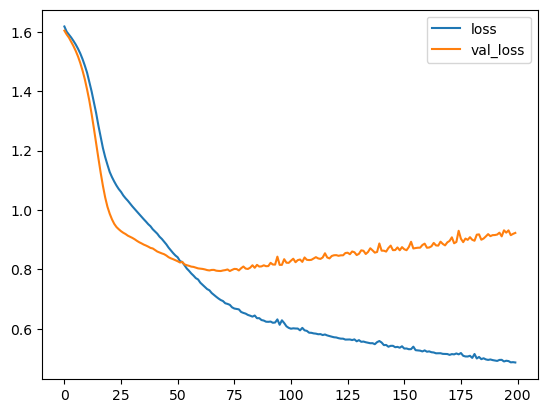

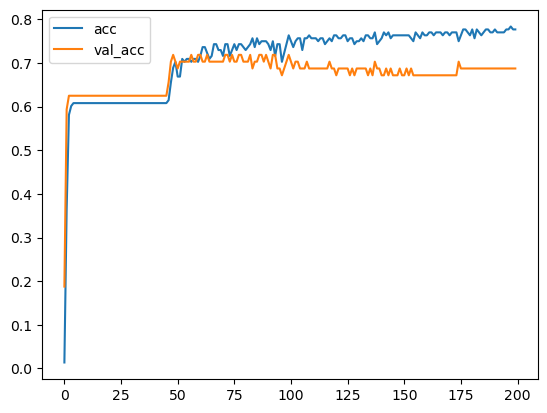

In [368]:
train_results =  pd.DataFrame(history.history)
train_results[['loss','val_loss']].plot()
train_results[['acc','val_acc']].plot()

In [369]:
model.load_weights(checkpoint_path)

In [370]:
학습 = model.predict(치수_scaled[shuff_train])
검증 = model.predict(치수_scaled[shuff_val])

학습데이터 = np.argmax(학습, axis = 1)
검증데이터 = np.argmax(검증, axis = 1)
cnt_학습 = 0
cnt_검증 = 0
for i,j in zip(학습데이터, 체형_train[shuff_train]):
    if(i==j):
        cnt_학습 = cnt_학습 +1
print(f'학습 데이터:{cnt_학습} of {치수_scaled[shuff_train].shape[0]} are correct [{cnt_학습/치수_scaled[shuff_train].shape[0]*100}%]')

for i,j in zip(검증데이터, 체형_train[shuff_val]):
    if(i==j):
        cnt_검증 = cnt_검증 +1
print(f'검증 데이터:{cnt_검증} of {치수_scaled[shuff_val].shape[0]} are correct [{cnt_검증/치수_scaled[shuff_val].shape[0]*100}%]')

2/2 [==============================] - 0s 2ms/step
학습 데이터:106 of 148 are correct [71.62162162162163%]
검증 데이터:45 of 64 are correct [70.3125%]


In [371]:
치수_all_scaled.shape

(312, 23)

In [372]:
'''
Y_pred = model.predict(치수_all_scaled)
Y_pred_max = np.max(Y_pred,axis =1)

체형_pred = np.argmax(Y_pred, axis=1)
치수_train_selected = []
체형_pred_selected =[]
cnt = 0
for i,j,k,m in zip(체형_pred,체형,range(312),Y_pred_max):
    if(i==j):
        if(m>0.75):
            cnt=cnt+1
            치수_train_selected.append(치수[k])
            체형_pred_selected.append(i)
    else:
        '''
'''
        치수_train_selected.append(치수_train[k])
        체형_pred_selected.append(i)
        
        if(m < 0.7):
            치수_train_selected.append(치수[k])
            체형_pred_selected.append(i)
'''
'''
        
print(f'{cnt} of {체형.shape[0]} are correct [{cnt/체형.shape[0]*100}%]')
'''

"\n        \nprint(f'{cnt} of {체형.shape[0]} are correct [{cnt/체형.shape[0]*100}%]')\n"

In [373]:
Y_pred = model.predict(치수_scaled)
Y_pred_max = np.max(Y_pred,axis =1)

체형_pred = np.argmax(Y_pred, axis=1)
치수_train_selected = []
체형_pred_selected =[]
cnt = 0
for i,j,k,m in zip(체형_pred,체형_train,range(치수_scaled.shape[0]),Y_pred_max):
    if(i==j):
        cnt=cnt+1
        치수_train_selected.append(치수_train[k])
        체형_pred_selected.append(i)
    else:
        '''
        치수_train_selected.append(치수_train[k])
        체형_pred_selected.append(i)
        '''
        if(m < 0.7):
            치수_train_selected.append(치수_train[k])
            체형_pred_selected.append(i)
        
        
print(f'{cnt} of {체형_train.shape[0]} are correct [{cnt/체형_train.shape[0]*100}%]')

7/7 [==============================] - 0s 1ms/step
151 of 212 are correct [71.22641509433963%]


In [374]:
print(f'{cnt}개의 정답과 {len(치수_train_selected)-cnt}개의 모호한 데이터추출')
print(len(치수_train_selected))

151개의 정답과 48개의 모호한 데이터추출
199


In [375]:
체형_Unlabeled_pred = model.predict(minmax_scaler.transform(치수_test))
체형_Unlabeled_pred = np.argmax(체형_Unlabeled_pred, axis=1)

4/4 [==============================] - 0s 1ms/step


In [376]:
체형_test = 체형_Unlabeled_pred

In [377]:
치수_merge = np.concatenate((치수_train_selected, 치수_test), axis = 0)
체형_merge = np.concatenate((체형_pred_selected, 체형_test))
체형_merge = np.reshape(체형_merge, (치수_merge.shape[0],1))
data_merge = np.concatenate((치수_merge,체형_merge), axis = 1)
np.random.shuffle(data_merge)

In [378]:
split = round(치수_merge.shape[0]*0.7)

In [379]:
치수2_train, 체형2_train, 치수2_test, 체형2_test = data_merge[:split,0:-1], data_merge[:split,-1], data_merge[split:,0:-1], data_merge[split:,-1]
체형2_train = 체형2_train.astype('float32')
체형2_test = 체형2_test.astype('float32')
치수2_train_scaled = minmax_scaler.transform(치수2_train)

In [380]:
치수2_train.shape

(209, 23)

In [381]:
th = round(치수2_train_scaled.shape[0]*0.7)

In [382]:
checkpoint_path2 = './temp2/checkpoint.ckpt'
optimizer = optimizers.Adam()
model2 = Sequential()
model_check_point2 = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_path2, monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch', options=None)
model2.add(tf.keras.layers.Dense(23, input_dim =23,activation = 'relu'))
model2.add(tf.keras.layers.Dense(23,activation = 'relu'))
model2.add(tf.keras.layers.Dense(11,activation = 'relu'))
model2.add(tf.keras.layers.Dense(11,activation = 'relu'))
model2.add(tf.keras.layers.Dense(5,  activation='softmax'))
model2.compile(
    loss=sparse_categorical_crossentropy, 
    optimizer=optimizer, 
    metrics=['acc'])
model2.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 23)                552       
                                                                 
 dense_155 (Dense)           (None, 23)                552       
                                                                 
 dense_156 (Dense)           (None, 11)                264       
                                                                 
 dense_157 (Dense)           (None, 11)                132       
                                                                 
 dense_158 (Dense)           (None, 5)                 60        
                                                                 
Total params: 1,560
Trainable params: 1,560
Non-trainable params: 0
_________________________________________________________________


In [383]:
history2 = model2.fit(치수2_train_scaled[:th], 체형2_train[:th], validation_data=(치수2_train_scaled[th:], 체형2_train[th:]), epochs = 200, callbacks = [model_check_point2])

Epoch 1/200
5/5 [==============================] - 1s 58ms/step - loss: 1.5279 - acc: 0.2466 - val_loss: 1.4589 - val_acc: 0.2857
Epoch 2/200
5/5 [==============================] - 0s 15ms/step - loss: 1.4330 - acc: 0.2808 - val_loss: 1.3803 - val_acc: 0.2857
Epoch 3/200
5/5 [==============================] - 0s 59ms/step - loss: 1.3532 - acc: 0.2808 - val_loss: 1.3066 - val_acc: 0.3651
Epoch 4/200
5/5 [==============================] - 0s 16ms/step - loss: 1.2754 - acc: 0.4041 - val_loss: 1.2301 - val_acc: 0.5873
Epoch 5/200
5/5 [==============================] - 0s 17ms/step - loss: 1.1962 - acc: 0.7329 - val_loss: 1.1514 - val_acc: 0.7302
Epoch 6/200
5/5 [==============================] - 0s 16ms/step - loss: 1.1161 - acc: 0.7123 - val_loss: 1.0714 - val_acc: 0.7143
Epoch 7/200
5/5 [==============================] - 0s 17ms/step - loss: 1.0344 - acc: 0.7192 - val_loss: 0.9939 - val_acc: 0.7143
Epoch 8/200
5/5 [==============================] - 0s 17ms/step - loss: 0.9578 - acc: 0.71

5/5 [==============================] - 0s 18ms/step - loss: 0.4989 - acc: 0.7260 - val_loss: 0.4853 - val_acc: 0.7143
Epoch 64/200
5/5 [==============================] - 0s 18ms/step - loss: 0.4875 - acc: 0.7329 - val_loss: 0.4732 - val_acc: 0.7143
Epoch 65/200
5/5 [==============================] - 0s 17ms/step - loss: 0.4744 - acc: 0.7192 - val_loss: 0.4617 - val_acc: 0.7143
Epoch 66/200
5/5 [==============================] - 0s 15ms/step - loss: 0.4556 - acc: 0.7260 - val_loss: 0.4403 - val_acc: 0.7302
Epoch 67/200
5/5 [==============================] - 0s 15ms/step - loss: 0.4408 - acc: 0.7740 - val_loss: 0.4263 - val_acc: 0.7460
Epoch 68/200
5/5 [==============================] - 0s 18ms/step - loss: 0.4234 - acc: 0.7945 - val_loss: 0.4063 - val_acc: 0.8413
Epoch 69/200
5/5 [==============================] - 0s 18ms/step - loss: 0.4071 - acc: 0.8219 - val_loss: 0.3920 - val_acc: 0.8413
Epoch 70/200
5/5 [==============================] - 0s 16ms/step - loss: 0.3902 - acc: 0.8973 - 

Epoch 126/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0709 - acc: 0.9795 - val_loss: 0.1718 - val_acc: 0.9683
Epoch 127/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0783 - acc: 0.9658 - val_loss: 0.1929 - val_acc: 0.9683
Epoch 128/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0745 - acc: 0.9795 - val_loss: 0.1926 - val_acc: 0.9683
Epoch 129/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0697 - acc: 0.9863 - val_loss: 0.1758 - val_acc: 0.9683
Epoch 130/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0685 - acc: 0.9795 - val_loss: 0.1933 - val_acc: 0.9683
Epoch 131/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0724 - acc: 0.9795 - val_loss: 0.1834 - val_acc: 0.9683
Epoch 132/200
5/5 [==============================] - 0s 15ms/step - loss: 0.0658 - acc: 0.9726 - val_loss: 0.1701 - val_acc: 0.9683
Epoch 133/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0667 -

5/5 [==============================] - 0s 6ms/step - loss: 0.0332 - acc: 0.9863 - val_loss: 0.1991 - val_acc: 0.9683
Epoch 189/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0317 - acc: 0.9932 - val_loss: 0.1758 - val_acc: 0.9683
Epoch 190/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0336 - acc: 1.0000 - val_loss: 0.1937 - val_acc: 0.9683
Epoch 191/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0355 - acc: 0.9863 - val_loss: 0.1923 - val_acc: 0.9683
Epoch 192/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0336 - acc: 0.9863 - val_loss: 0.1890 - val_acc: 0.9683
Epoch 193/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0315 - acc: 1.0000 - val_loss: 0.1869 - val_acc: 0.9683
Epoch 194/200
5/5 [==============================] - 0s 7ms/step - loss: 0.0303 - acc: 1.0000 - val_loss: 0.1964 - val_acc: 0.9683
Epoch 195/200
5/5 [==============================] - 0s 6ms/step - loss: 0.0340 - acc: 1.0000 - v

<AxesSubplot:>

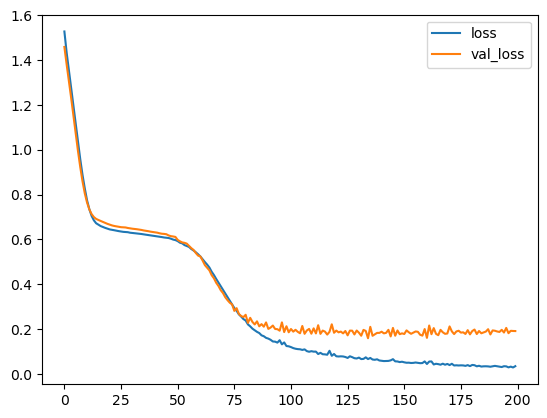

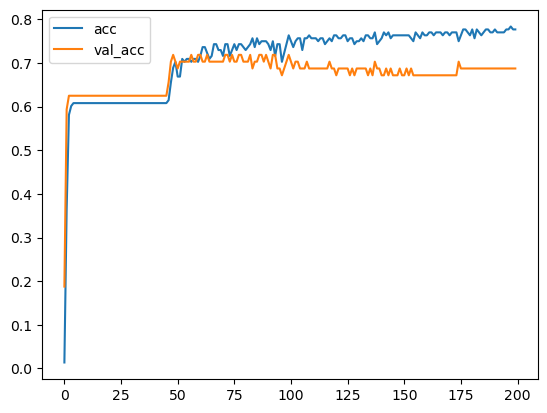

In [384]:
results = pd.DataFrame(history2.history)
results[['loss', 'val_loss']].plot()
train_results[['acc','val_acc']].plot()

In [385]:
model2.load_weights(checkpoint_path2)

In [386]:
학습2 = model2.predict(치수2_train_scaled[:th])
검증2 = model2.predict(치수2_train_scaled[th:])

학습데이터2 = np.argmax(학습2, axis = 1)
검증데이터2 = np.argmax(검증2, axis = 1)
cnt_학습2 = 0
cnt_검증2 = 0
for i,j in zip(학습데이터2, 체형2_train[:th]):
    if(i==j):
        cnt_학습2 = cnt_학습2 +1
print(f'학습 데이터:{cnt_학습2} of {치수2_train_scaled[:th].shape[0]} are correct [{cnt_학습2/치수2_train_scaled[:th].shape[0]*100}%]')

for i,j in zip(검증데이터2, 체형2_train[th:]):
    if(i==j):
        cnt_검증2 = cnt_검증2 +1
print(f'검증 데이터:{cnt_검증2} of {치수2_train_scaled[th:].shape[0]} are correct [{cnt_검증2/치수2_train_scaled[th:].shape[0]*100}%]')

2/2 [==============================] - 0s 997us/step
학습 데이터:142 of 146 are correct [97.26027397260275%]
검증 데이터:61 of 63 are correct [96.82539682539682%]


In [387]:
Y2_pred = model2.predict(minmax_scaler.transform(치수2_test))
체형2_pred = np.argmax(Y2_pred, axis=1)
cnt2 = 0
for i, j in zip(체형2_test, 체형2_pred):
    if(i ==j ):
        cnt2 = cnt2 +1
print(f'{cnt2} of {체형2_test.shape[0]} are correct [{cnt2/체형2_test.shape[0]*100}%]')


3/3 [==============================] - 0s 1ms/step
87 of 90 are correct [96.66666666666667%]


In [388]:
print(f'{cnt/체형_train.shape[0]*100}%   {cnt2/체형2_test.shape[0]*100}%')

71.22641509433963%   96.66666666666667%


In [389]:
model.evaluate(치수_scaled[shuff], 체형_train[shuff])

7/7 [==============================] - 0s 997us/step - loss: 0.7102 - acc: 0.7123


[0.7102386355400085, 0.7122641801834106]

In [390]:
model2.evaluate(minmax_scaler.transform(치수2_test), 체형2_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.0653 - acc: 0.9667


[0.06529112160205841, 0.9666666388511658]

In [391]:
y_pred_result = model2.predict(minmax_scaler.transform(치수))

10/10 [==============================] - 0s 888us/step


In [392]:
체형예측결과 = np.argmax(y_pred_result,axis = 1)
Y_pred_max2 = np.max(y_pred_result,axis =1)

In [451]:
선별 =[]
오차 = []
for i,j,k in zip(체형예측결과,체형,range(체형.shape[0])):
    if(i == j):
        if((Y_pred_max2[k] >= 0.9)):
            선별.append(k)
            
for i,j,k in zip(체형예측결과,체형,range(체형.shape[0])):
    if(i != j):
        오차.append(k)

In [454]:
len(선별)
np.random.shuffle(선별)

In [455]:
num_data[2:,2:][선별]

array([['2022_08_11_112650_642_3337.pcd', 830.01, 587.76, ..., 2473.35,
        2651.65, 2],
       ['2022_11_17_074128_750_5491.scd', 900.01, 611.78, ..., 2626.62,
        2784.84, 2],
       ['2022_11_17_074208_750_5491.scd', 1360.01, 598.04, ..., 2725.98,
        3047.45, 2],
       ...,
       ['2022_11_17_173647_722_1534.scd', 780.01, 688.04, ..., 2639.9,
        2763.15, 2],
       ['2022_11_17_170940_748_3891.scd', 900.01, 626.48, ..., 2618.48,
        2806.56, 2],
       ['2022_11_17_173608_722_1534.scd', 780.01, 634.89, ..., 2630.85,
        2782.91, 2]], dtype=object)

In [456]:
num_data[2:,2:][선별[:97]].shape

(97, 25)

In [457]:
len(오차)

87

In [458]:
num_data[2:,2:][오차[:3]]

array([['2022_08_10_165601_760_123454.pcd', 970.01, 622.54, 675.94,
        461765.7, 808.44, 853.45, 549666.94, 2649.29, 663.43, 864.49,
        449852.03, 2501.56, 662.73, 695.8, 813.32, 837.79, 864.83, 0.87,
        0.95, 499497.47, 567715.08, 2537.74, 2691.14, 3],
       ['2022_08_10_165803_700_123456.pcd', 700.01, 696.68, 703.77,
        468718.41, 817.1, 868.14, 562018.52, 2660.47, 642.44, 876.33,
        443294.4, 2463.53, 647.76, 712.73, 837.88, 848.09, 901.17, 0.89,
        0.96, 519239.96, 590198.55, 2545.8, 2754.54, 2],
       ['2022_08_10_170204_700_123123.pcd', 960.01, 603.49, 614.55,
        371601.44, 750.18, 764.14, 467379.3, 2437.73, 645.62, 831.8,
        424863.04, 2381.24, 437.34, 662.44, 768.73, 760.68, 843.88, 0.9,
        1.01, 434706.62, 483358.75, 2298.18, 2483.84, 1]], dtype=object)

In [459]:
선별_merge = np.concatenate((num_data[2:,2:][선별[:97]], num_data[2:,2:][오차[:3]]), axis = 0)

In [460]:
선별_merge.shape

(100, 25)

In [461]:
dataF = pd.DataFrame(선별_merge)
filename = 'Results.csv'
dataF.to_csv(filename, encoding="euc-kr", index=False)